# **1.Setup**

In [30]:
!pip install pandas numpy matplotlib seaborn wordcloud scikit-learn nltk snscrape

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **2.Load Dataset**

In [32]:
from google.colab import drive
import pandas as pd

file_path = '/content/drive/MyDrive/NMDS/emotion_dataset.csv'
df = pd.read_csv(file_path)
print(df.head())

  im feeling rather rotten so im not very ambitious right now;sadness
0  im updating my blog because i feel shitty;sadness                 
1  i never make her separate from me because i do...                 
2  i left with my bouquet of red and yellow tulip...                 
3  i was feeling a little vain when i did this on...                 
4  i cant walk into a shop anywhere where i do no...                 


# 3.Clean the **Text**

In [33]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'http\S+','',text)    #remove URLs
  text = re.sub(r'@\w+','',text)       #remove mentions
  text = re.sub(r'#\w+','',text)       #remove hashtags
  text = re.sub(r'[^a-z\s]', '', text)    # remove punctuation and numbers
  words = text.split()
  words = [word for word in words if word not in stopwords.words('english')]
  return ' '.join(words)

  df['clean_text'] = df['text'].apply(clean_text)
  df.head()




# **4.Exploratory Data Analysis(EDA)**

  im feeling rather rotten so im not very ambitious right now;sadness  \
0  im updating my blog because i feel shitty;sadness                    
1  i never make her separate from me because i do...                    
2  i left with my bouquet of red and yellow tulip...                    
3  i was feeling a little vain when i did this on...                    
4  i cant walk into a shop anywhere where i do no...                    

                                          clean_text  emotion  
0          im updating my blog because i feel shitty  sadness  
1  i never make her separate from me because i do...  sadness  
2  i left with my bouquet of red and yellow tulip...      joy  
3    i was feeling a little vain when i did this one  sadness  
4  i cant walk into a shop anywhere where i do no...     fear  


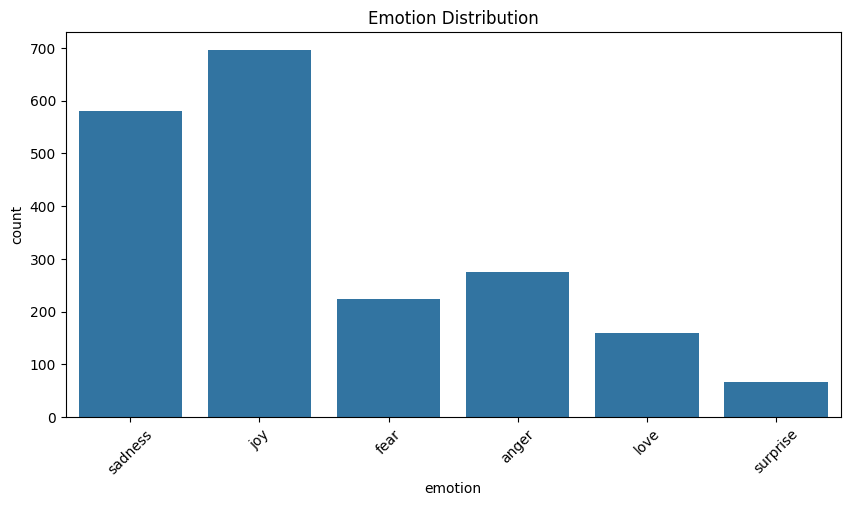

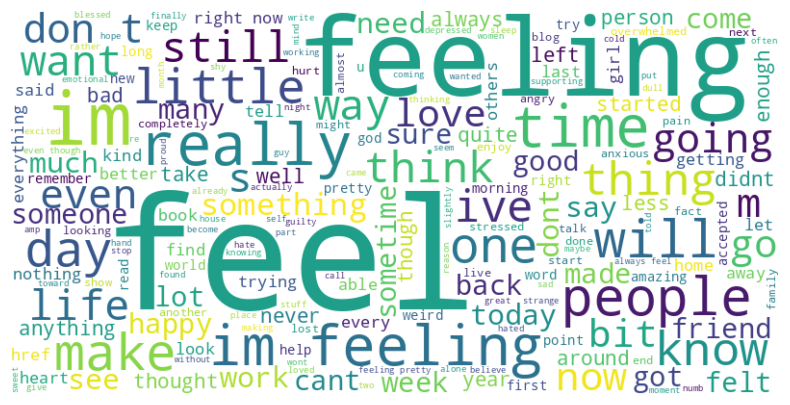

In [34]:
# After loading your dataset
df = pd.read_csv(file_path)

# Clean the column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

# Split the single column into two columns
df[['clean_text', 'emotion']] = df[df.columns[0]].str.split(';', expand=True)

# Check if splitting worked
print(df.head())

# Now you can plot without issues
plt.figure(figsize=(10,5))
sns.countplot(x='emotion', data=df)
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

# Generate wordcloud
text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.xticks(rotation=45)
plt.axis('off')
plt.show()

# **5.Feature Engineering(TF-IDF)**

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6.Model Building**

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **7.Model Evaluation**

Accuracy: 0.58

Classification classification_report:
               precision    recall  f1-score   support

       anger       0.50      0.08      0.14        49
        fear       0.71      0.11      0.19        45
         joy       0.54      0.93      0.68       137
        love       1.00      0.06      0.12        31
     sadness       0.63      0.76      0.69       124
    surprise       0.00      0.00      0.00        14

    accuracy                           0.58       400
   macro avg       0.56      0.32      0.30       400
weighted avg       0.60      0.58      0.50       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


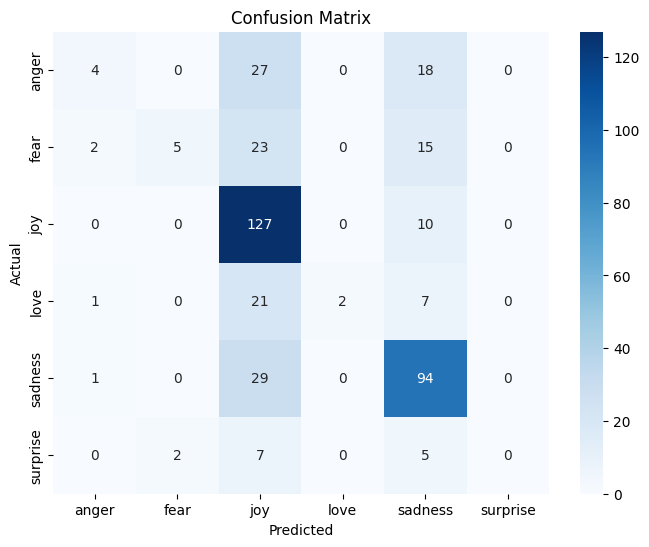

In [37]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification classification_report:\n",classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#**8.Save Your Model and Vectorizer**

In [42]:

pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00


# **9.Create the app.py(streamlit code)**

In [49]:
import gradio as gr
import joblib

# Load model and vectorizer
model = joblib.load("emotion_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Prediction function
def predict_emotion(text):
    if not text.strip():
        return "Please enter some text."
    transformed = vectorizer.transform([text])
    prediction = model.predict(transformed)
    return prediction[0]

# Sample examples
examples = [
    "I just got a promotion at work today — I’m so happy and excited!",
    "I miss my old life. Everything feels so empty now.",
    "I can't believe they treated me like that. Totally unacceptable!",
    "I'm really scared about tomorrow's results.",
    "Just opened my email and saw a job offer from my dream company!",
    "I’m so lucky to have someone who supports me no matter what."
]

# Gradio UI with custom styles
with gr.Blocks(css="""
    .input-textbox textarea {background-color: #f0f8ff !important; color: #000;}
    .emotion-output textarea {background-color: #fff3cd !important; color: #333; font-weight: bold;}
    .submit-button button {
        background-color: #ff9800 !important;
        color: white !important;
        font-weight: bold;
        border-radius: 8px;
        padding: 10px 20px;
    }
""") as demo:

    gr.Markdown(
        """
        # Decoding Emotions from Social Media Conversations
        *Enter a post or comment and discover the emotion behind it!*
        """
    )

    with gr.Row():
        input_text = gr.Textbox(
            lines=3,
            label="Your Text",
            placeholder="Type or paste a social media post here...",
            elem_classes=["input-textbox"]
        )

    output_label = gr.Textbox(
        label="Predicted Emotion",
        interactive=False,
        elem_classes=["emotion-output"]
    )

    submit_btn = gr.Button("Predict Emotion", elem_classes=["submit-button"])
    submit_btn.click(fn=predict_emotion, inputs=input_text, outputs=output_label)

    gr.Examples(examples=examples, inputs=input_text)

    gr.Markdown("---")
    gr.Markdown("Created by HKTeam | Powered by Gradio")

# Launch
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b1b0cbc7fcfb812da.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
